# 0710012 何權祐 HW3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib3
import re
from io import StringIO

%matplotlib inline

# Data Input

In [2]:
title_name = ['area','perimeter','compactness','length of kernel','width of kernel','asymmetry coefficient','length of kernel groove','Label']
data = np.asanyarray(pd.read_csv(r'seeds_dataset.txt',header=None, engine='python',sep='\t+'))
data = pd.DataFrame(data,columns=title_name)
data

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,Label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


# Data Processing

In [3]:
from sklearn.utils import shuffle
data = shuffle(data)
feature = data.drop(columns=['Label']).reset_index(drop=True)
Label = pd.DataFrame(data.Label,columns=['Label']).reset_index(drop=True)
Label

,Label
0,3.0
1,2.0
2,3.0
3,1.0
4,3.0
...,...
205,2.0
206,3.0
207,2.0
208,1.0


# K-means Clustering

In [4]:
import random
def KMeans(P:pd.DataFrame, k:int):
    Center = np.asanyarray(P.values[random.sample(range(0,len(P)-1), k)])
    pre_Center = np.zeros((k,P.values.shape[1]))
    cluster = np.zeros(len(P))
    count = 0
    Index_sort = [[0],[0],[0]]
    pre_Index_sort = [[1],[1],[1]]
    
    # not sum(map(sum,pow(Center-pre_Center,2)))==0
    while not (np.array_equal(Index_sort[0],pre_Index_sort[0])) and not (np.array_equal(Index_sort[1],pre_Index_sort[1])) and count < 1e4:
        pre_Index_sort = Index_sort.copy()
        Index_sort.clear()
        count+=1
        pre_Center = Center.copy()
        # assignment step
        coor_total = np.zeros((k,P.values.shape[1]))
        num = [0,0,0]
        for i in range(len(P)):
            dict = [np.linalg.norm(P.values[i]-a) for a in Center]
            coor_total[np.argmin(dict)] += P.values[i]
            num[np.argmin(dict)] += 1
            cluster[i] = np.argmin(dict)
            # print(np.argmin(dict)," ")
        
        # update step
        Index_sort = [np.where(cluster==0),np.where(cluster==1),np.where(cluster==2)]
        for i in range(k):
            if num[i] != 0:
                Center[i] = np.asanyarray(coor_total[i])/num[i]
                # print(Center[i])
            else: 
                Center[i] = Center[i]
    return Index_sort, Center

In [5]:
Clus_index, c =  KMeans(feature,3)
# print(Clus_index)

In [6]:
for i in range(3):
    a = Label.values[Clus_index[i]].flatten().astype(int)
    if np.argmax(np.bincount(a))==1:
        first = np.bincount(a)[1:]
    elif np.argmax(np.bincount(a))==2:
        second = np.bincount(a)[1:]
    else:
        third = np.bincount(a)[1:]

Confusion_mat=[first,second,third]

# Result

In [7]:
# Confusion Matrix
total = 0
col = [0,0,0]
print('Confusion Matrix:\n\t',end='')
for i in range(3):
    ind = 0
    for n in Confusion_mat[i]:
        print(n,end='\t')
        total += n
        col[ind] += n
        ind += 1
    if len(Confusion_mat[i])==2:
        print('0',end='')
    print('\n\t',end='')

# Accuracy
print('\nAccuracy:')
correct = Confusion_mat[0][0] +Confusion_mat[1][1]+Confusion_mat[2][2]
print('\t',round(correct/total*100,2),'%')

# Presicion
print('\nPresicion:')
print('\t',round(Confusion_mat[0][0]/sum(Confusion_mat[0])*100,2),'%\t',
        round(Confusion_mat[1][1]/sum(Confusion_mat[1])*100,2),'%\t',
        round(Confusion_mat[2][2]/sum(Confusion_mat[2])*100,2),'%')

print('\nRecall(Sensitivity):')
print('\t',round(Confusion_mat[0][0]/col[0]*100,2),'%\t',
        round(Confusion_mat[1][1]/col[1]*100,2),'%\t',
        round(Confusion_mat[2][2]/col[2]*100,2),'%')

Confusion Matrix:
	60	9	2	
	1	61	0
	9	0	68	
	
Accuracy:
	 90.0 %

Presicion:
	 84.51 %	 98.39 %	 88.31 %

Recall(Sensitivity):
	 85.71 %	 87.14 %	 97.14 %


# Comparison & Conclusion 
As this project didn't make any comparison; therefore, the discussion part is skipped.

As for the conclusion part, we can see from the result of the realization of K-means cluster that the method can bring out quite decent performance. To extract a conclusion from that, we can say that this "Wheet" data has almost all of its case which has the same label a pretty ressemble features; therefore, the performance with such high accuracy can be created.

# Question
>Choose two features to execute your K-means function and draw a scatter plot with the computed centers and the predicted label for each instance

I choose the first to features,'area','perimeter'

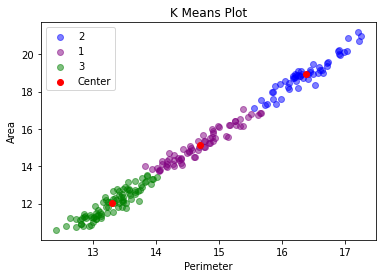

In [8]:
feature_s = feature.iloc[:, 0:2]
Clus_ind, cent = KMeans(feature_s,3)
for i in range(len(feature_s)):
    if i in np.asanyarray(Clus_ind[0]):
        c1 = plt.scatter(feature_s.values[i][1],feature_s.values[i][0],c='blue', alpha=0.5)
    elif i in np.asanyarray(Clus_ind[1]):
        c2 = plt.scatter(feature_s.values[i][1],feature_s.values[i][0],c='purple', alpha=0.5)
    else:
        c3 = plt.scatter(feature_s.values[i][1],feature_s.values[i][0],c='green', alpha=0.5)

center=plt.scatter(cent[0][1],cent[0][0],c='red', alpha=1)
plt.scatter(cent[1][1],cent[1][0],c='red', alpha=1)
plt.scatter(cent[2][1],cent[2][0],c='red', alpha=1)

leg = [0,0,0]
for i in range(3):
    arr = Label.values.flatten()[Clus_ind[i]]
    counts = np.bincount(np.int64(arr))
    leg[i]= np.argmax(counts)

plt.legend((c1,c2,c3,center),(str(leg[0]),str(leg[1]),str(leg[2]),'Center'),loc='upper left')
plt.xlabel("Perimeter")
plt.ylabel("Area")
plt.title("K Means Plot")
plt.show()